<a href="https://colab.research.google.com/github/Pratyushk2003/Credit-Card-Fraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246764,153319.0,1.941691,-0.484915,-0.904488,-0.246992,0.110037,0.502058,-0.472294,0.129722,0.888585,...,-0.208092,-0.575486,0.278327,-0.211913,-0.400750,-0.326783,-0.003680,-0.039647,50.85,0.0
246765,153319.0,-0.981287,0.426547,2.002575,-0.856142,0.617870,0.059042,0.653113,-0.068280,0.024714,...,-0.227973,-0.541517,-0.322364,-0.499869,0.340232,-0.557660,-0.227047,-0.146074,32.53,0.0
246766,153320.0,-2.752616,2.299573,-0.334676,-1.155076,-1.258117,-0.278921,-1.147125,1.749092,0.552836,...,0.050775,-0.581949,0.222312,0.529518,-0.210550,-0.343307,-0.877507,0.004045,0.23,0.0
246767,153321.0,-0.343196,1.017765,-0.146110,-0.555413,0.185019,-1.123604,0.629282,0.237998,-0.184090,...,-0.219335,-0.625323,0.122378,-0.121300,-0.447235,0.149356,0.119990,0.022699,9.99,0.0
246768,153322.0,-2.799232,2.899762,-2.063198,-3.556835,4.551158,2.841095,3.325648,-1.830258,4.570694,...,-0.927144,0.778700,-0.484150,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246769 entries, 0 to 246768
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    246769 non-null  float64
 1   V1      246769 non-null  float64
 2   V2      246769 non-null  float64
 3   V3      246769 non-null  float64
 4   V4      246769 non-null  float64
 5   V5      246769 non-null  float64
 6   V6      246769 non-null  float64
 7   V7      246769 non-null  float64
 8   V8      246769 non-null  float64
 9   V9      246769 non-null  float64
 10  V10     246769 non-null  float64
 11  V11     246769 non-null  float64
 12  V12     246769 non-null  float64
 13  V13     246769 non-null  float64
 14  V14     246769 non-null  float64
 15  V15     246769 non-null  float64
 16  V16     246769 non-null  float64
 17  V17     246769 non-null  float64
 18  V18     246769 non-null  float64
 19  V19     246769 non-null  float64
 20  V20     246769 non-null  float64
 21  V21     24

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    246319
1.0       449
Name: Class, dtype: int64

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(246319, 31)
(449, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    246319.000000
mean         90.944941
std         252.398352
min           0.000000
25%           6.000000
50%          23.310000
75%          79.950000
max       19656.530000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     449.000000
mean      121.118597
std       252.911251
min         0.000000
25%         1.000000
50%         9.290000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,84446.863271,-0.033057,-0.026543,0.123327,0.020354,-0.034251,0.022310,-0.005715,0.000580,0.005611,...,0.004358,-0.003817,-0.012847,-0.006821,0.000858,0.023487,0.001766,-0.001183,0.000781,90.944941
1.0,73172.202673,-5.113548,3.841349,-7.275478,4.632747,-3.497006,-1.365035,-5.940823,0.615337,-2.631902,...,0.356580,0.755750,0.022223,-0.048957,-0.087154,0.046406,0.040162,0.157467,0.073882,121.118597


In [13]:
#Under-Sampling

#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
legit_sample = legit.sample(n=492)

In [14]:
#Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
229034,145773.0,-3.418657,-3.228166,0.812075,-0.096455,5.208599,-0.797125,-1.676965,0.768249,0.230629,...,0.157488,-0.320729,0.366561,-1.911710,0.545597,0.156143,-0.225550,-0.097825,30.58,0.0
244438,152350.0,-1.344067,-0.883157,-1.765387,-0.734000,-1.201673,0.747606,2.964558,0.239440,-0.447870,...,0.304606,-0.355073,1.530708,0.090388,0.396061,-0.150439,-0.176220,-0.003339,688.12,0.0
244744,152468.0,2.000536,-0.047047,-0.959456,0.577721,-0.513136,-1.810686,0.207027,-0.389953,0.661950,...,0.299926,0.992809,0.125113,0.885914,0.106495,-0.157575,-0.020931,-0.051887,2.49,0.0
50046,44324.0,-0.492596,0.976523,1.664666,0.001562,-0.062942,-0.614897,0.637429,0.057768,-0.402765,...,-0.176875,-0.431812,0.062611,0.376714,-0.312587,0.080973,0.279350,0.121121,7.78,0.0
237887,149442.0,0.047388,0.912845,0.312117,-0.589633,0.458228,-1.121331,1.042757,-0.239175,-0.128684,...,-0.254782,-0.523825,0.059007,0.054961,-0.472424,0.135934,0.251588,0.098555,0.99,0.0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243848,152098.0,-4.124316,3.748597,-7.926507,7.763242,-0.769375,-2.031171,-3.474549,0.107121,-1.551352,...,0.547097,0.687854,0.429939,-0.620601,-0.369688,0.367349,-2.664767,0.417101,1.00,1.0
244004,152165.0,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,-1.528448,...,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1.00,1.0
244333,152307.0,-5.222968,4.641827,-8.858204,7.723502,-1.507035,-2.159484,-4.205164,0.979334,-1.505637,...,0.561892,0.624207,0.536429,-0.628334,-0.222651,0.382208,-2.693036,0.407935,1.00,1.0
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1.0
245556,152802.0,1.322724,-0.843911,-2.096888,0.759759,-0.196377,-1.166353,0.482534,-0.349791,1.045007,...,0.133815,-0.121562,-0.208574,-0.254752,-0.098324,-0.613874,0.002654,0.072386,357.95,1.0


In [17]:
new_dataset['Class'].value_counts()

0.0    492
1.0    449
Name: Class, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,88287.085366,-0.059325,-0.019381,0.119550,-0.137534,-0.037409,-0.082500,0.020747,-0.079707,0.061738,...,0.022224,-0.015797,0.038971,0.015852,0.049448,0.030566,0.033472,-0.015047,-0.016172,80.931037
1.0,73172.202673,-5.113548,3.841349,-7.275478,4.632747,-3.497006,-1.365035,-5.940823,0.615337,-2.631902,...,0.356580,0.755750,0.022223,-0.048957,-0.087154,0.046406,0.040162,0.157467,0.073882,121.118597


In [19]:
#Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
229034  145773.0 -3.418657 -3.228166  0.812075 -0.096455  5.208599 -0.797125   
244438  152350.0 -1.344067 -0.883157 -1.765387 -0.734000 -1.201673  0.747606   
244744  152468.0  2.000536 -0.047047 -0.959456  0.577721 -0.513136 -1.810686   
50046    44324.0 -0.492596  0.976523  1.664666  0.001562 -0.062942 -0.614897   
237887  149442.0  0.047388  0.912845  0.312117 -0.589633  0.458228 -1.121331   
...          ...       ...       ...       ...       ...       ...       ...   
243848  152098.0 -4.124316  3.748597 -7.926507  7.763242 -0.769375 -2.031171   
244004  152165.0 -4.673231  4.195976 -8.392423  7.743215 -1.138803 -2.094899   
244333  152307.0 -5.222968  4.641827 -8.858204  7.723502 -1.507035 -2.159484   
245347  152710.0  0.051075  1.310427  0.733222  2.620282  1.402358  0.528489   
245556  152802.0  1.322724 -0.843911 -2.096888  0.759759 -0.196377 -1.166353   

              V7        V8        V9  .

In [21]:
print(Y)

229034    0.0
244438    0.0
244744    0.0
50046     0.0
237887    0.0
         ... 
243848    1.0
244004    1.0
244333    1.0
245347    1.0
245556    1.0
Name: Class, Length: 941, dtype: float64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(941, 30) (752, 30) (189, 30)


In [24]:
#Model Training using Logistic Regression
model = LogisticRegression()

In [25]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print(X_train)

            Time        V1        V2        V3        V4        V5        V6  \
214662  139767.0  0.467992  1.100118 -5.607145  2.204714 -0.578539 -0.174200   
140786   83934.0 -0.433222  2.428379 -3.996454  4.871299 -1.796308 -0.586868   
213116  139117.0 -3.975939 -1.244939 -3.707414  4.544772  4.050676 -3.407679   
202458  134338.0  2.267085 -0.718776 -1.579234 -1.008849 -0.353316 -1.094668   
77872    57255.0 -0.842768 -0.284409  2.789554 -1.510620 -1.099445 -0.179379   
...          ...       ...       ...       ...       ...       ...       ...   
88307    62080.0 -1.599457  2.607720 -2.987193  3.064156 -2.497914 -0.541103   
189959  128627.0 -0.865285 -0.979506  2.587540 -2.781144 -0.887336 -0.579689   
223572  143434.0 -2.729482  3.312495 -4.242710  5.036985 -0.376561 -1.532462   
242340  151454.0  2.073855 -1.124756 -0.394842 -0.794517 -1.311651 -0.719281   
30100    35771.0 -3.218952  2.708535 -3.263042  1.361866 -1.645776 -1.852982   

              V7        V8        V9  .

In [28]:
print(Y_train)

214662    1.0
140786    1.0
213116    1.0
202458    0.0
77872     0.0
         ... 
88307     1.0
189959    0.0
223572    1.0
242340    0.0
30100     1.0
Name: Class, Length: 752, dtype: float64


In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9547872340425532


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
215615  140148.0 -1.835392  0.198108  1.242749  0.992947 -0.319989 -0.496382   
45994    42597.0 -1.506865  0.401547  1.112910  0.437201 -0.210538 -0.735376   
44556    41991.0 -4.566342  3.353451 -4.572028  3.616119 -2.493138 -1.090000   
120661   75913.0 -1.987175 -1.020138  2.767060 -0.005716  0.977951 -1.182867   
215132  139951.0 -2.921944 -0.228062 -5.877289  2.201884 -1.935440  0.631141   
...          ...       ...       ...       ...       ...       ...       ...   
195017  130862.0 -2.360815 -1.199657  1.419907 -0.372166  1.589528 -1.387049   
58761    48533.0  1.243848  0.524526 -0.538884  1.209196  0.479538 -0.197429   
143482   85382.0  1.256312  0.358248  0.307238  0.693024 -0.367201 -1.072133   
123380   76905.0  1.233779  0.324662  0.214576  0.720651 -0.337757 -1.342528   
180139  124396.0 -1.653314 -1.297531  1.134618 -3.138671  0.513910  0.015352   

              V7        V8        V9  .

In [32]:
print(Y_test)

215615    0.0
45994     0.0
44556     1.0
120661    0.0
215132    1.0
         ... 
195017    0.0
58761     1.0
143482    0.0
123380    0.0
180139    0.0
Name: Class, Length: 189, dtype: float64


In [33]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9365079365079365


In [48]:
confidence_scores_logistic = model.predict_proba(X_test)
print(confidence_scores_logistic)

[[9.94308846e-01 5.69115370e-03]
 [9.04773302e-01 9.52266977e-02]
 [0.00000000e+00 1.00000000e+00]
 [9.91456401e-01 8.54359896e-03]
 [2.13162821e-14 1.00000000e+00]
 [7.24627053e-01 2.75372947e-01]
 [0.00000000e+00 1.00000000e+00]
 [2.22044605e-16 1.00000000e+00]
 [9.90202992e-01 9.79700784e-03]
 [8.88178420e-15 1.00000000e+00]
 [7.32320792e-01 2.67679208e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [9.44395943e-01 5.56040570e-02]
 [0.00000000e+00 1.00000000e+00]
 [8.64040136e-01 1.35959864e-01]
 [9.97953859e-01 2.04614079e-03]
 [9.95856683e-01 4.14331717e-03]
 [9.78163962e-01 2.18360378e-02]
 [8.81635701e-01 1.18364299e-01]
 [9.43072220e-01 5.69277805e-02]
 [8.67042609e-01 1.32957391e-01]
 [3.61557104e-01 6.38442896e-01]
 [6.61753747e-01 3.38246253e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.97096316e-01 8.02903684e-01]
 [9.90501684e-01 9.49831616e-03]
 [9.79006444e-01 2.09935558e-02]
 [8.49965155e-01 1.50034845e-01]
 [8.352271

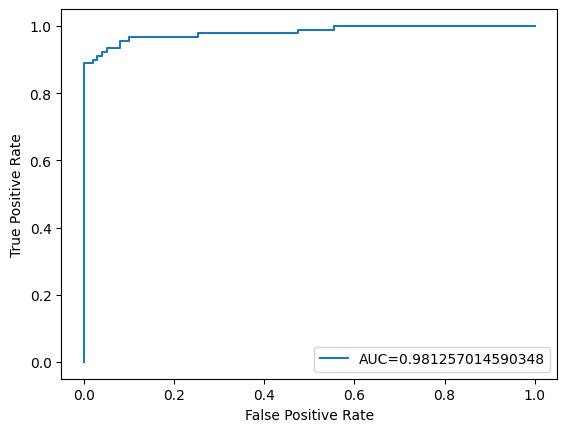

In [34]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [35]:
#SVM
# Create an SVM classifier object
classifier = svm.SVC(kernel='linear')

In [36]:
# Train the classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [37]:
# accuracy on training data
y_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_pred, Y_train)

In [38]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9042553191489362


In [39]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [40]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8888888888888888


Random Forest

In [41]:
# Create a Random Forest classifier object
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
# Train the classifier
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [43]:
# accuracy on training data
y_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_pred, Y_train)

In [44]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [45]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9417989417989417


In [47]:
confidence_scores_rf = classifier.predict_proba(X_test)
print(confidence_scores_rf)

[[0.83 0.17]
 [1.   0.  ]
 [0.   1.  ]
 [0.92 0.08]
 [0.   1.  ]
 [0.67 0.33]
 [0.01 0.99]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.61 0.39]
 [0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.81 0.19]
 [0.99 0.01]
 [0.97 0.03]
 [0.97 0.03]
 [0.85 0.15]
 [0.98 0.02]
 [0.79 0.21]
 [0.94 0.06]
 [0.76 0.24]
 [0.   1.  ]
 [0.   1.  ]
 [0.66 0.34]
 [0.83 0.17]
 [0.97 0.03]
 [0.97 0.03]
 [0.99 0.01]
 [0.96 0.04]
 [0.69 0.31]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.98 0.02]
 [0.92 0.08]
 [0.85 0.15]
 [0.01 0.99]
 [0.02 0.98]
 [0.91 0.09]
 [0.99 0.01]
 [0.   1.  ]
 [0.94 0.06]
 [0.   1.  ]
 [0.77 0.23]
 [0.03 0.97]
 [0.97 0.03]
 [0.01 0.99]
 [0.92 0.08]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.98 0.02]
 [0.98 0.02]
 [0.98 0.02]
 [0.71 0.29]
 [0.01 0.99]
 [0.86 0.14]
 [0.98 0.02]
 [0.07 0.93]
 [1.   0.  ]
 [0.01 0.99]
 [0.   1.  ]
 [1.   0.  ]
 [0.92 0.08]
 [0.97 0.03]
 [0.96 0.04]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [0.   1.  ]
 [0.71 0.29]
 [0.95 0.05]
 [0.   1.  ]
 [0.03 0.97]